<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1L-xSPPZBjWZghqqtNSPCvQuDIkYnuDGL/view?usp=sharing
#https://drive.google.com/open?id=1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
#id del archivo: 1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
FILEID = "1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-04-22 22:23:29--  https://docs.google.com/uc?export=download&confirm=&id=1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0
Resolving docs.google.com (docs.google.com)... 74.125.124.102, 74.125.124.101, 74.125.124.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.124.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ac-docs.googleusercontent.com/docs/securesc/peqnpqvtbi8b0vrfsu20i60unln18jdk/ua7ltkp4pbgqlvn3srrdab6ng2rcd1ls/1587594150000/11146100322577758036/10238407339436409021Z/1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0?e=download [following]
--2020-04-22 22:23:29--  https://doc-04-ac-docs.googleusercontent.com/docs/securesc/peqnpqvtbi8b0vrfsu20i60unln18jdk/ua7ltkp4pbgqlvn3srrdab6ng2rcd1ls/1587594150000/11146100322577758036/10238407339436409021Z/1vYz6Aj_K23as73mJ_9Qwk4l4-s8bILn0?e=download
Resolving doc-04-ac-docs.googleusercontent.com (doc-04-ac-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

In [0]:
import time
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from main_functions import PRI,MiniBatchPRI,spectralClustering
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin


**Cargar Bases de datos**

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_

**Punto Fijo**

el tiempo requerido fue:1.0578737258911133sg
Ari: 0.420092362540827 y accuracy: 0.42857142857142855


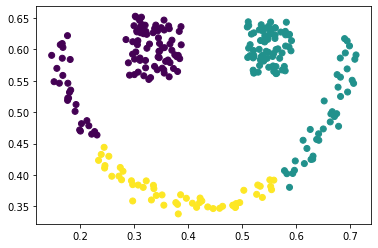

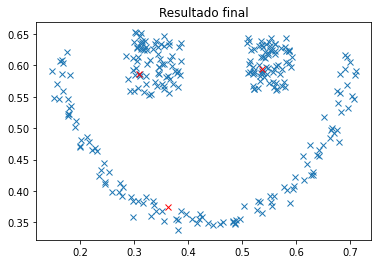

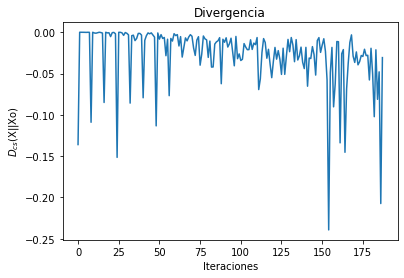

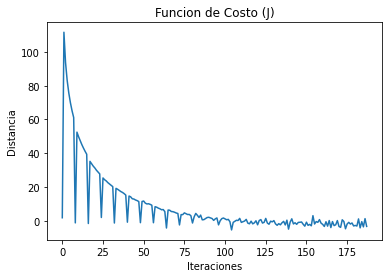

In [8]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=140, method='FP',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_FP=p.predict(happy)
Rari_Fp=adjusted_rand_score(labels_happy,labels_pre_FP)
Racc_Fp=accuracy_score(labels_happy,labels_pre_FP)
print('Ari: '+str(Rari_Fp)+' y'+' accuracy: '+str(Racc_Fp))
p.results()


**SGD**

el tiempo requerido fue:0.8726239204406738sg
Ari: 0.3879912262685081 y accuracy: 0.13909774436090225


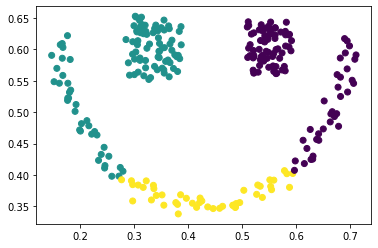

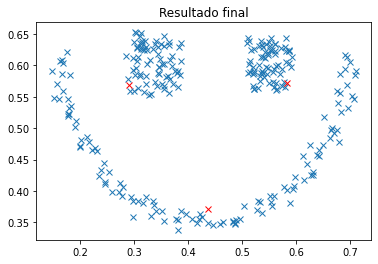

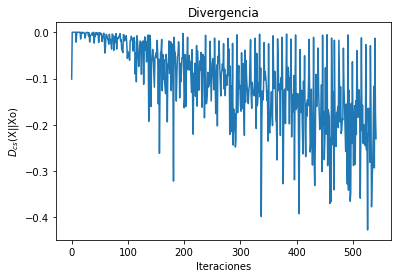

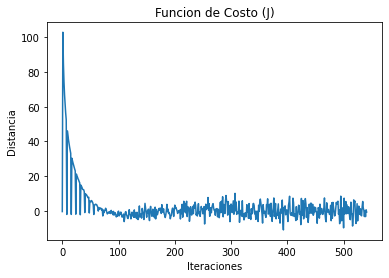

In [14]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGD=p.predict(happy)
Rari_SGD=adjusted_rand_score(labels_happy,labels_pre_SGD)
Racc_SGD=accuracy_score(labels_happy,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
p.results()

**Adam**

el tiempo requerido fue:1.0271010398864746sg
Ari: 0.3971507453364492 y accuracy: 0.7368421052631579


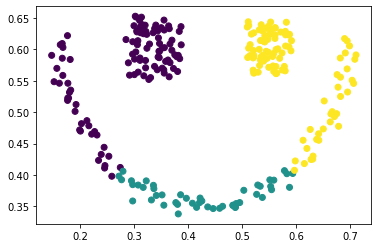

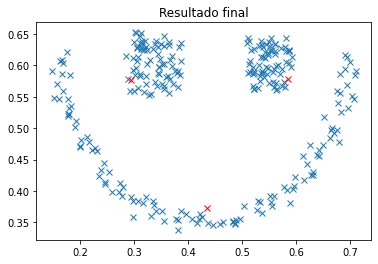

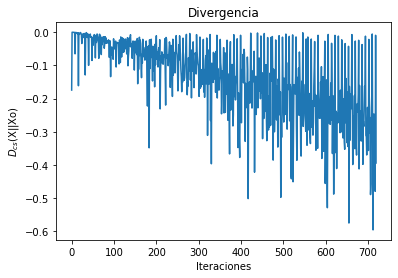

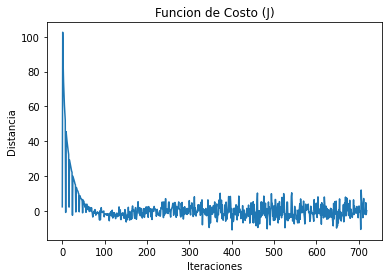

In [23]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',optimization='Adam',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDA=p.predict(happy)
Rari_SGDA=adjusted_rand_score(labels_happy,labels_pre_SGDA)
Racc_SGDA=accuracy_score(labels_happy,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))
p.results()

**Nadam**

el tiempo requerido fue:1.5400609970092773sg
Ari: 0.3932325300473249 y accuracy: 0.7330827067669173


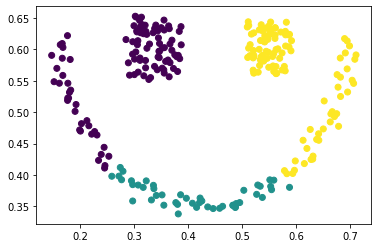

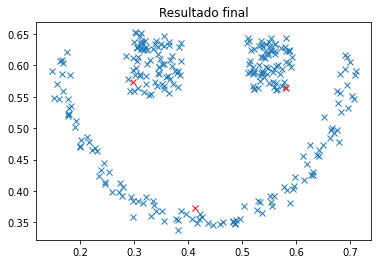

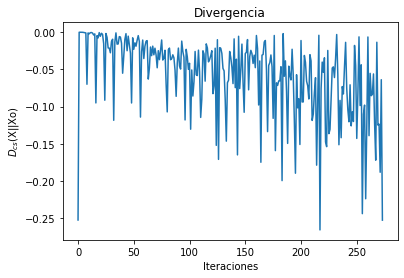

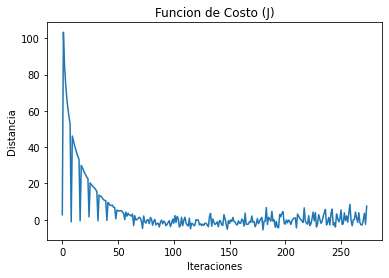

In [24]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',optimization='Nadam',
                 reduction_ = True)
p.fit(happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDN=p.predict(happy)
Rari_SGDN=adjusted_rand_score(labels_happy,labels_pre_SGDN)
Racc_SGDN=accuracy_score(labels_happy,labels_pre_SGDN)
print('Ari: '+str(Rari_SGDN)+' y'+' accuracy: '+str(Racc_SGDN))
p.results()

**KNN**

In [26]:
knn_happy=KMeans(n_clusters=3)
knn_happy.fit(happy)
labels_pre_KNN=knn_happy.labels_
Rari_KNN=adjusted_rand_score(labels_happy,labels_pre_KNN)
Racc_KNN=accuracy_score(labels_happy,labels_pre_KNN)
print('Ari: '+str(Rari_KNN)+' y'+' accuracy: '+str(Racc_KNN))


Ari: 0.4022130084121129 y accuracy: 0.12406015037593984


(0.11896678550925124,
 0.7385885706915943,
 0.32241855402955133,
 0.6681544114995808)

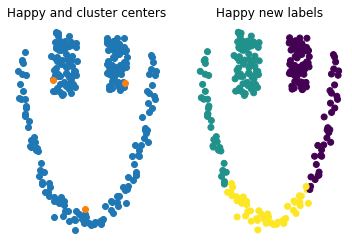

In [29]:
plt.subplot(121)
plt.scatter(happy[:,0],happy[:,1])
plt.scatter(knn_happy.cluster_centers_[:,0],knn_happy.cluster_centers_[:,1])
plt.title('Happy and cluster centers')
plt.axis('off')
plt.subplot(122)
plt.scatter(happy[:,0],happy[:,1],c=knn_happy.labels_)
plt.title('Happy new labels')
plt.axis('off')

**Spectral CLustering**

In [32]:
sc_happy=SpectralClustering(gamma=5,n_clusters=3,n_neighbors=2)
sc_happy.fit(happy)
labels_pre_sc=sc_happy.labels_
Rari_sc=adjusted_rand_score(labels_happy,labels_pre_sc)
Racc_sc=accuracy_score(labels_happy,labels_pre_KNN)
print('Ari: '+str(Rari_sc)+' y'+' accuracy: '+str(Racc_sc))


Ari: 0.47467806944910096 y accuracy: 0.12406015037593984


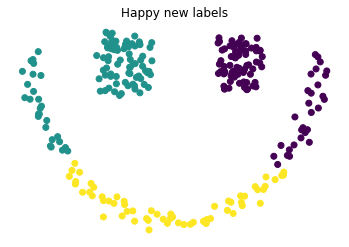

In [33]:
ax2=plt.subplot()
ax2=plt.scatter(happy[:,0],happy[:,1],c=sc_happy.labels_)
ax2=plt.title('Happy new labels')
ax2=plt.axis('off')